In [1]:
from nilearn import image, plotting, masking, maskers
from os.path import join

# purpose of this notebook
* plot the Y predicted brain maps from `scripts/step10_nilearn/PLS/PLS_pain.py`
* outputs: brain maps, thresholded

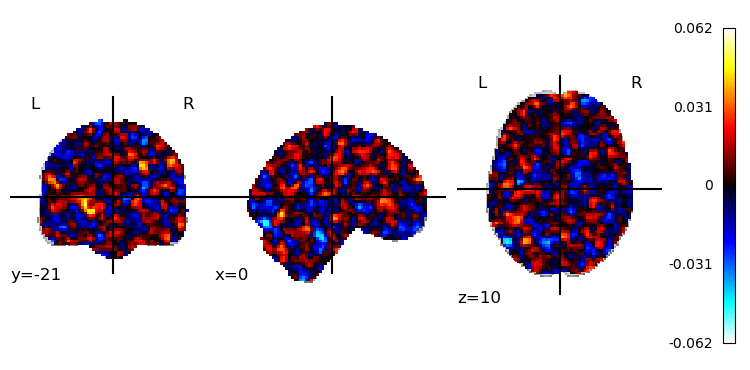

In [6]:
fpath = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/pls/task-pain_reg01-stim_reg02-expect_reg03-outcome'
fname = join(fpath,'pls-predweights_fold-4_component-01_desc-stimuluscontrast.nii.gz' )
plotting.plot_stat_map(fname)
image.load_img(fname)

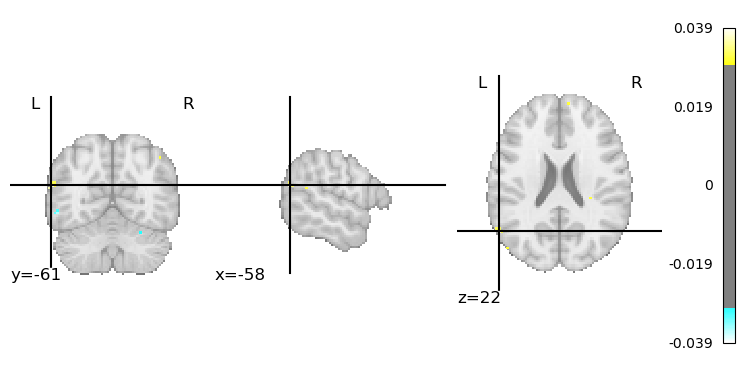

In [14]:
fname = 'pls-predweights_component-02_desc-expectrating.nii.gz'
plotting.plot_stat_map(join(fpath, fname), threshold=.03)

In [ ]:
# mask
# create mask from canlab mask. Use sample single trial as target shape/affine
imgfname = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial/sub-0060/sub-0060_ses-01_run-05_runtype-vicarious_event-stimulus_trial-011_cuetype-low_stimintensity-low.nii.gz'
ref_img = image.load_img(imgfname)

mask = image.load_img('/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii')
mask_img = masking.compute_epi_mask(mask, target_affine = ref_img.affine, target_shape = ref_img.shape)

nifti_masker = maskers.NiftiMasker(mask_img= mask_img,
                                           smoothing_fwhm=6,
                            target_affine = ref_img.affine, target_shape = ref_img.shape, 
                    )
# apply to loaded images
# apply ttest


## decoding

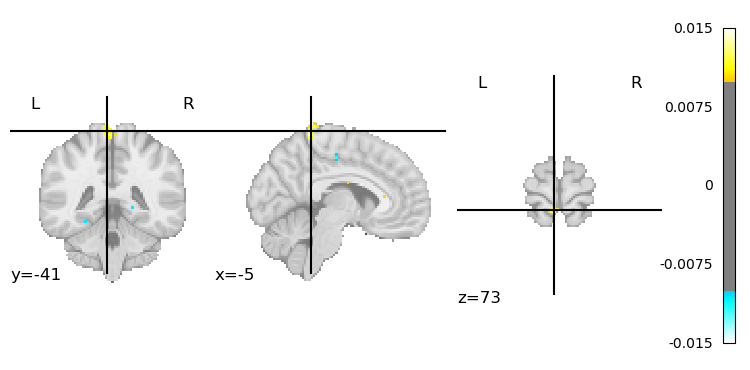

In [20]:
stim = image.load_img('/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/pls/NoNested_task-pain_X-brain_Y-stim-expect-outcome/pls-predweights_fold-0_component-01_desc-stimuluscontrast.nii.gz')
plotting.plot_stat_map(stim, threshold=.01)

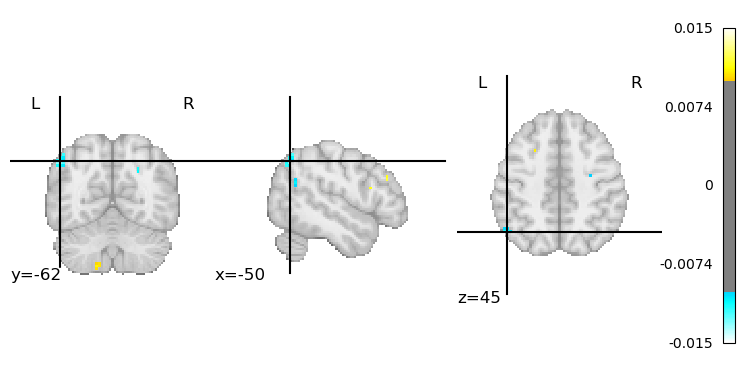

In [21]:
stim = image.load_img('/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/pls/NoNested_task-pain_X-brain_Y-stim-expect-outcome/pls-predweights_fold-0_component-02_desc-expectrating.nii.gz')
plotting.plot_stat_map(stim, threshold=.01)

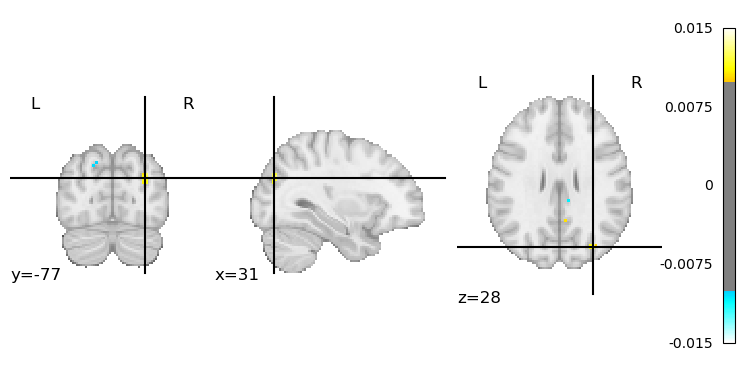

In [22]:
stim = image.load_img('/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/pls/NoNested_task-pain_X-brain_Y-stim-expect-outcome/pls-predweights_fold-0_component-03_desc-outcomerating.nii.gz')
plotting.plot_stat_map(stim, threshold=.01)

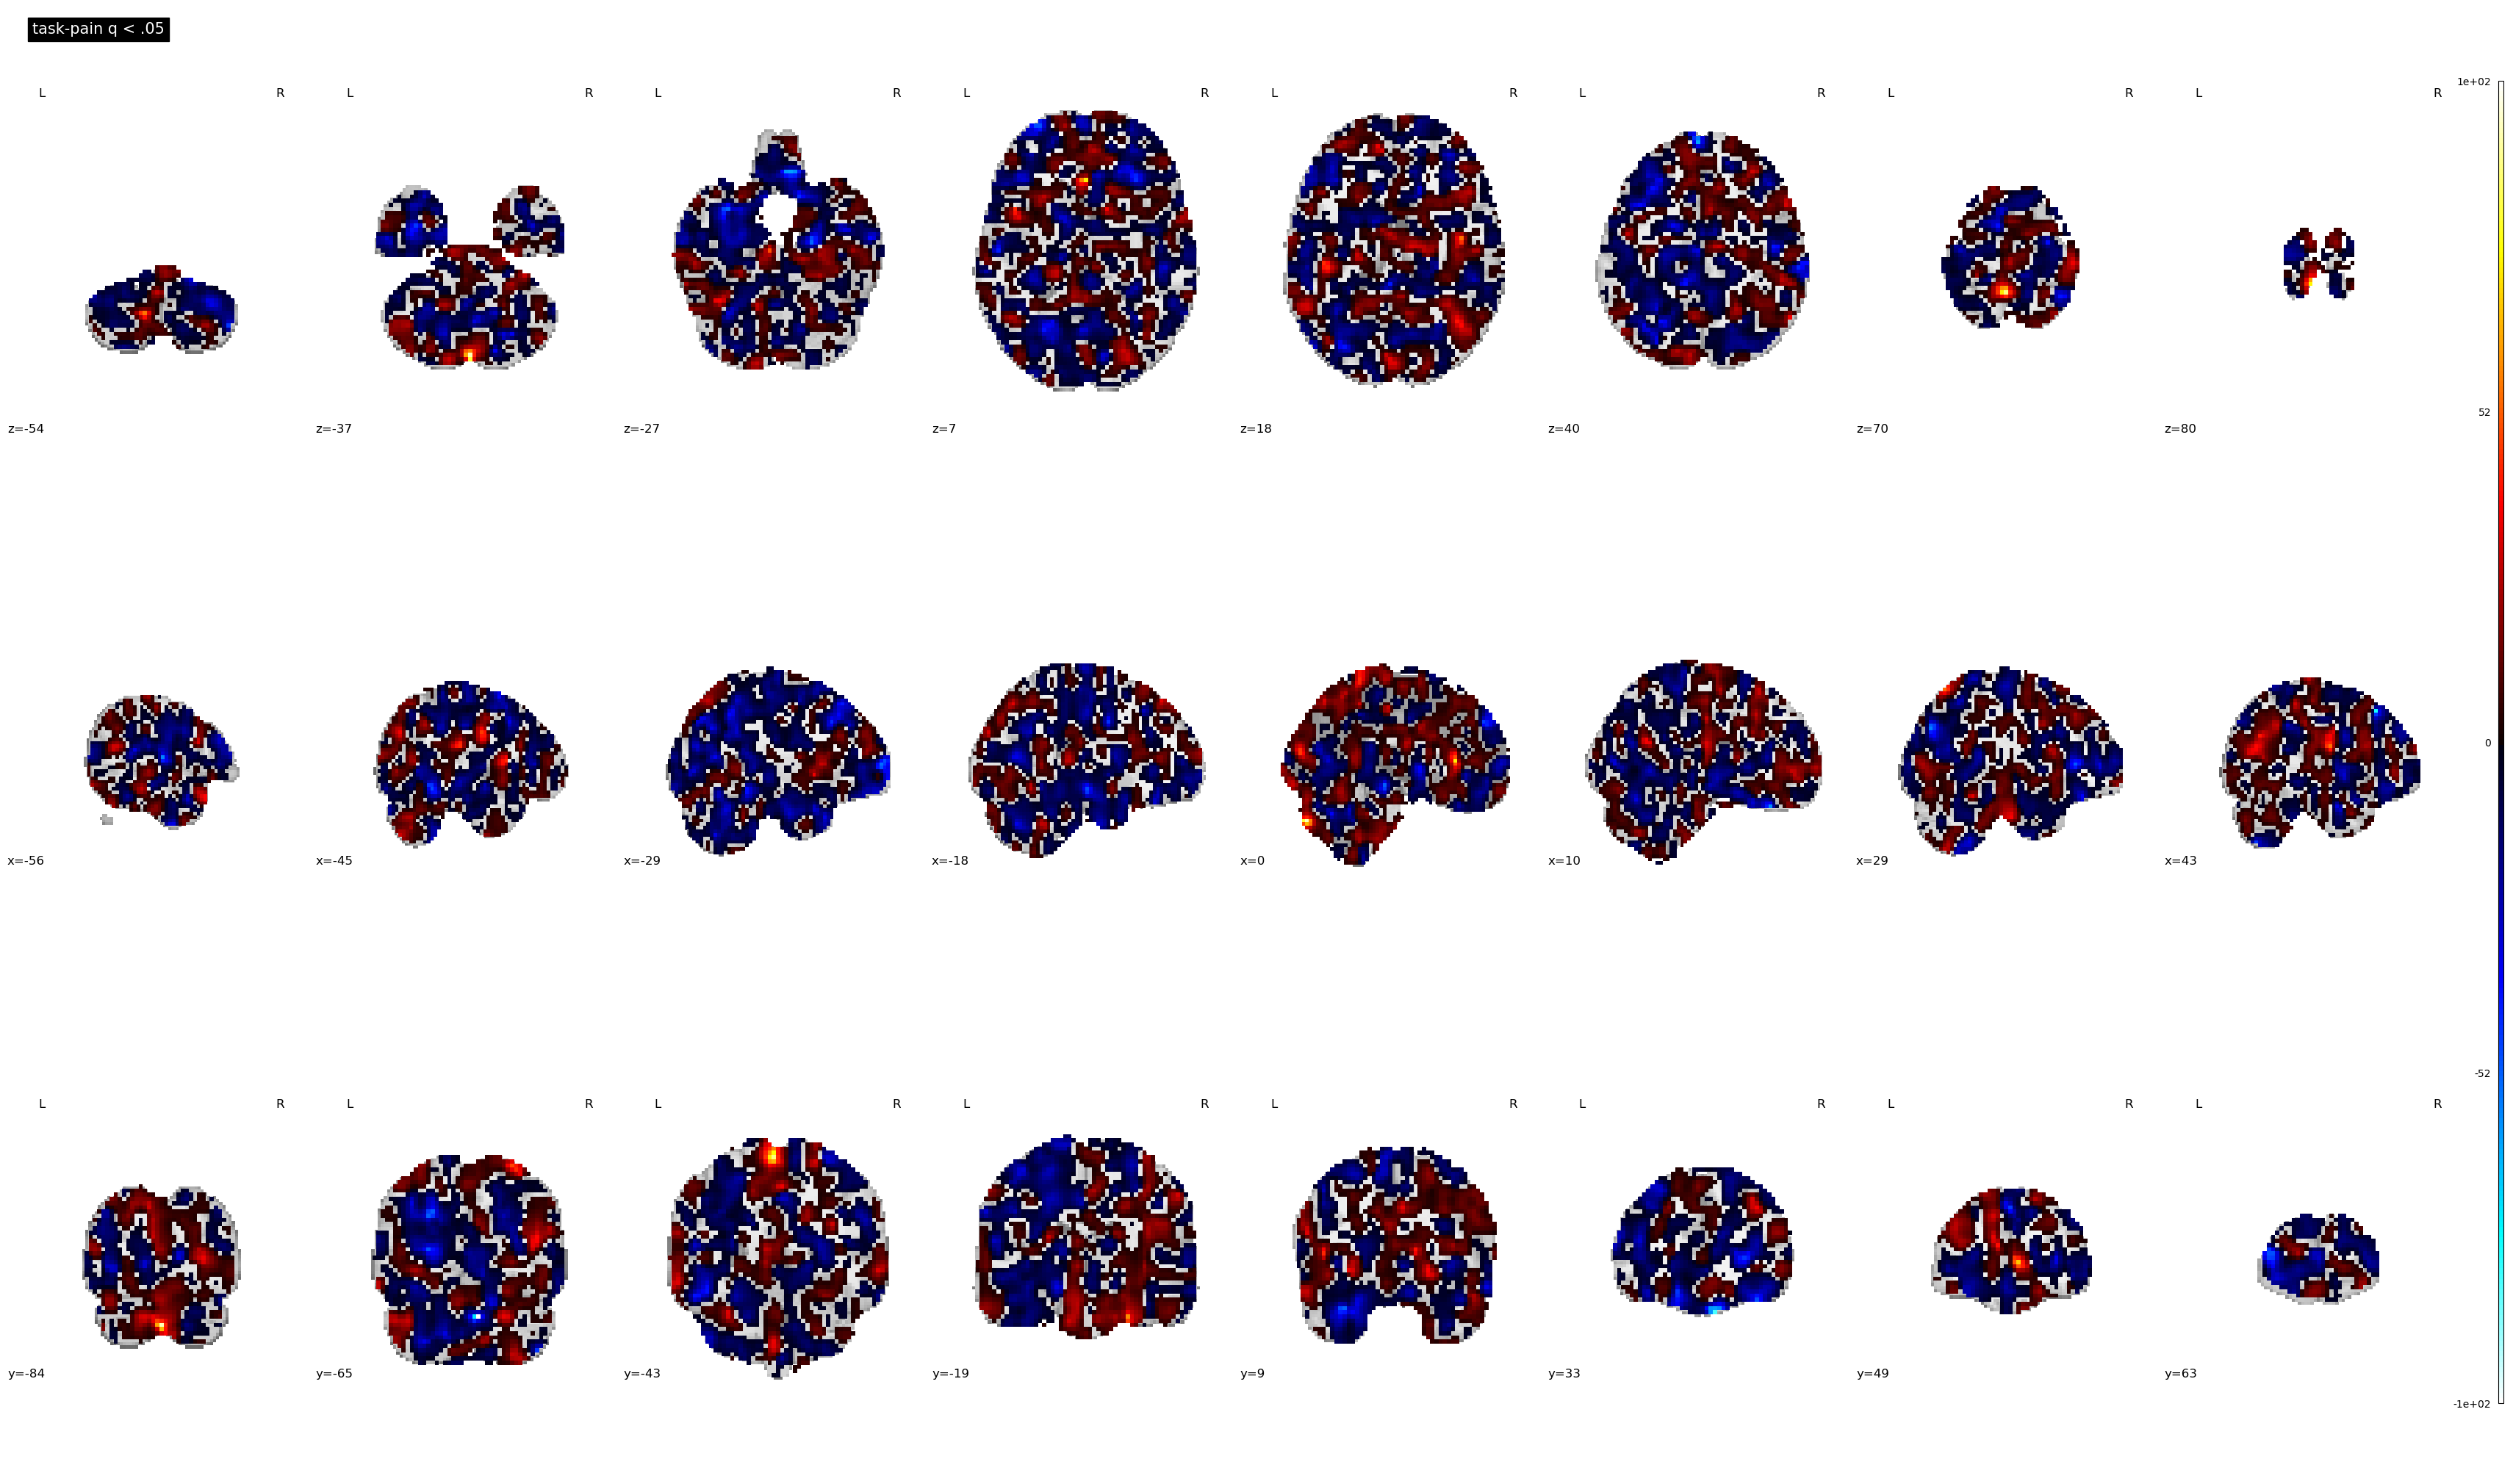

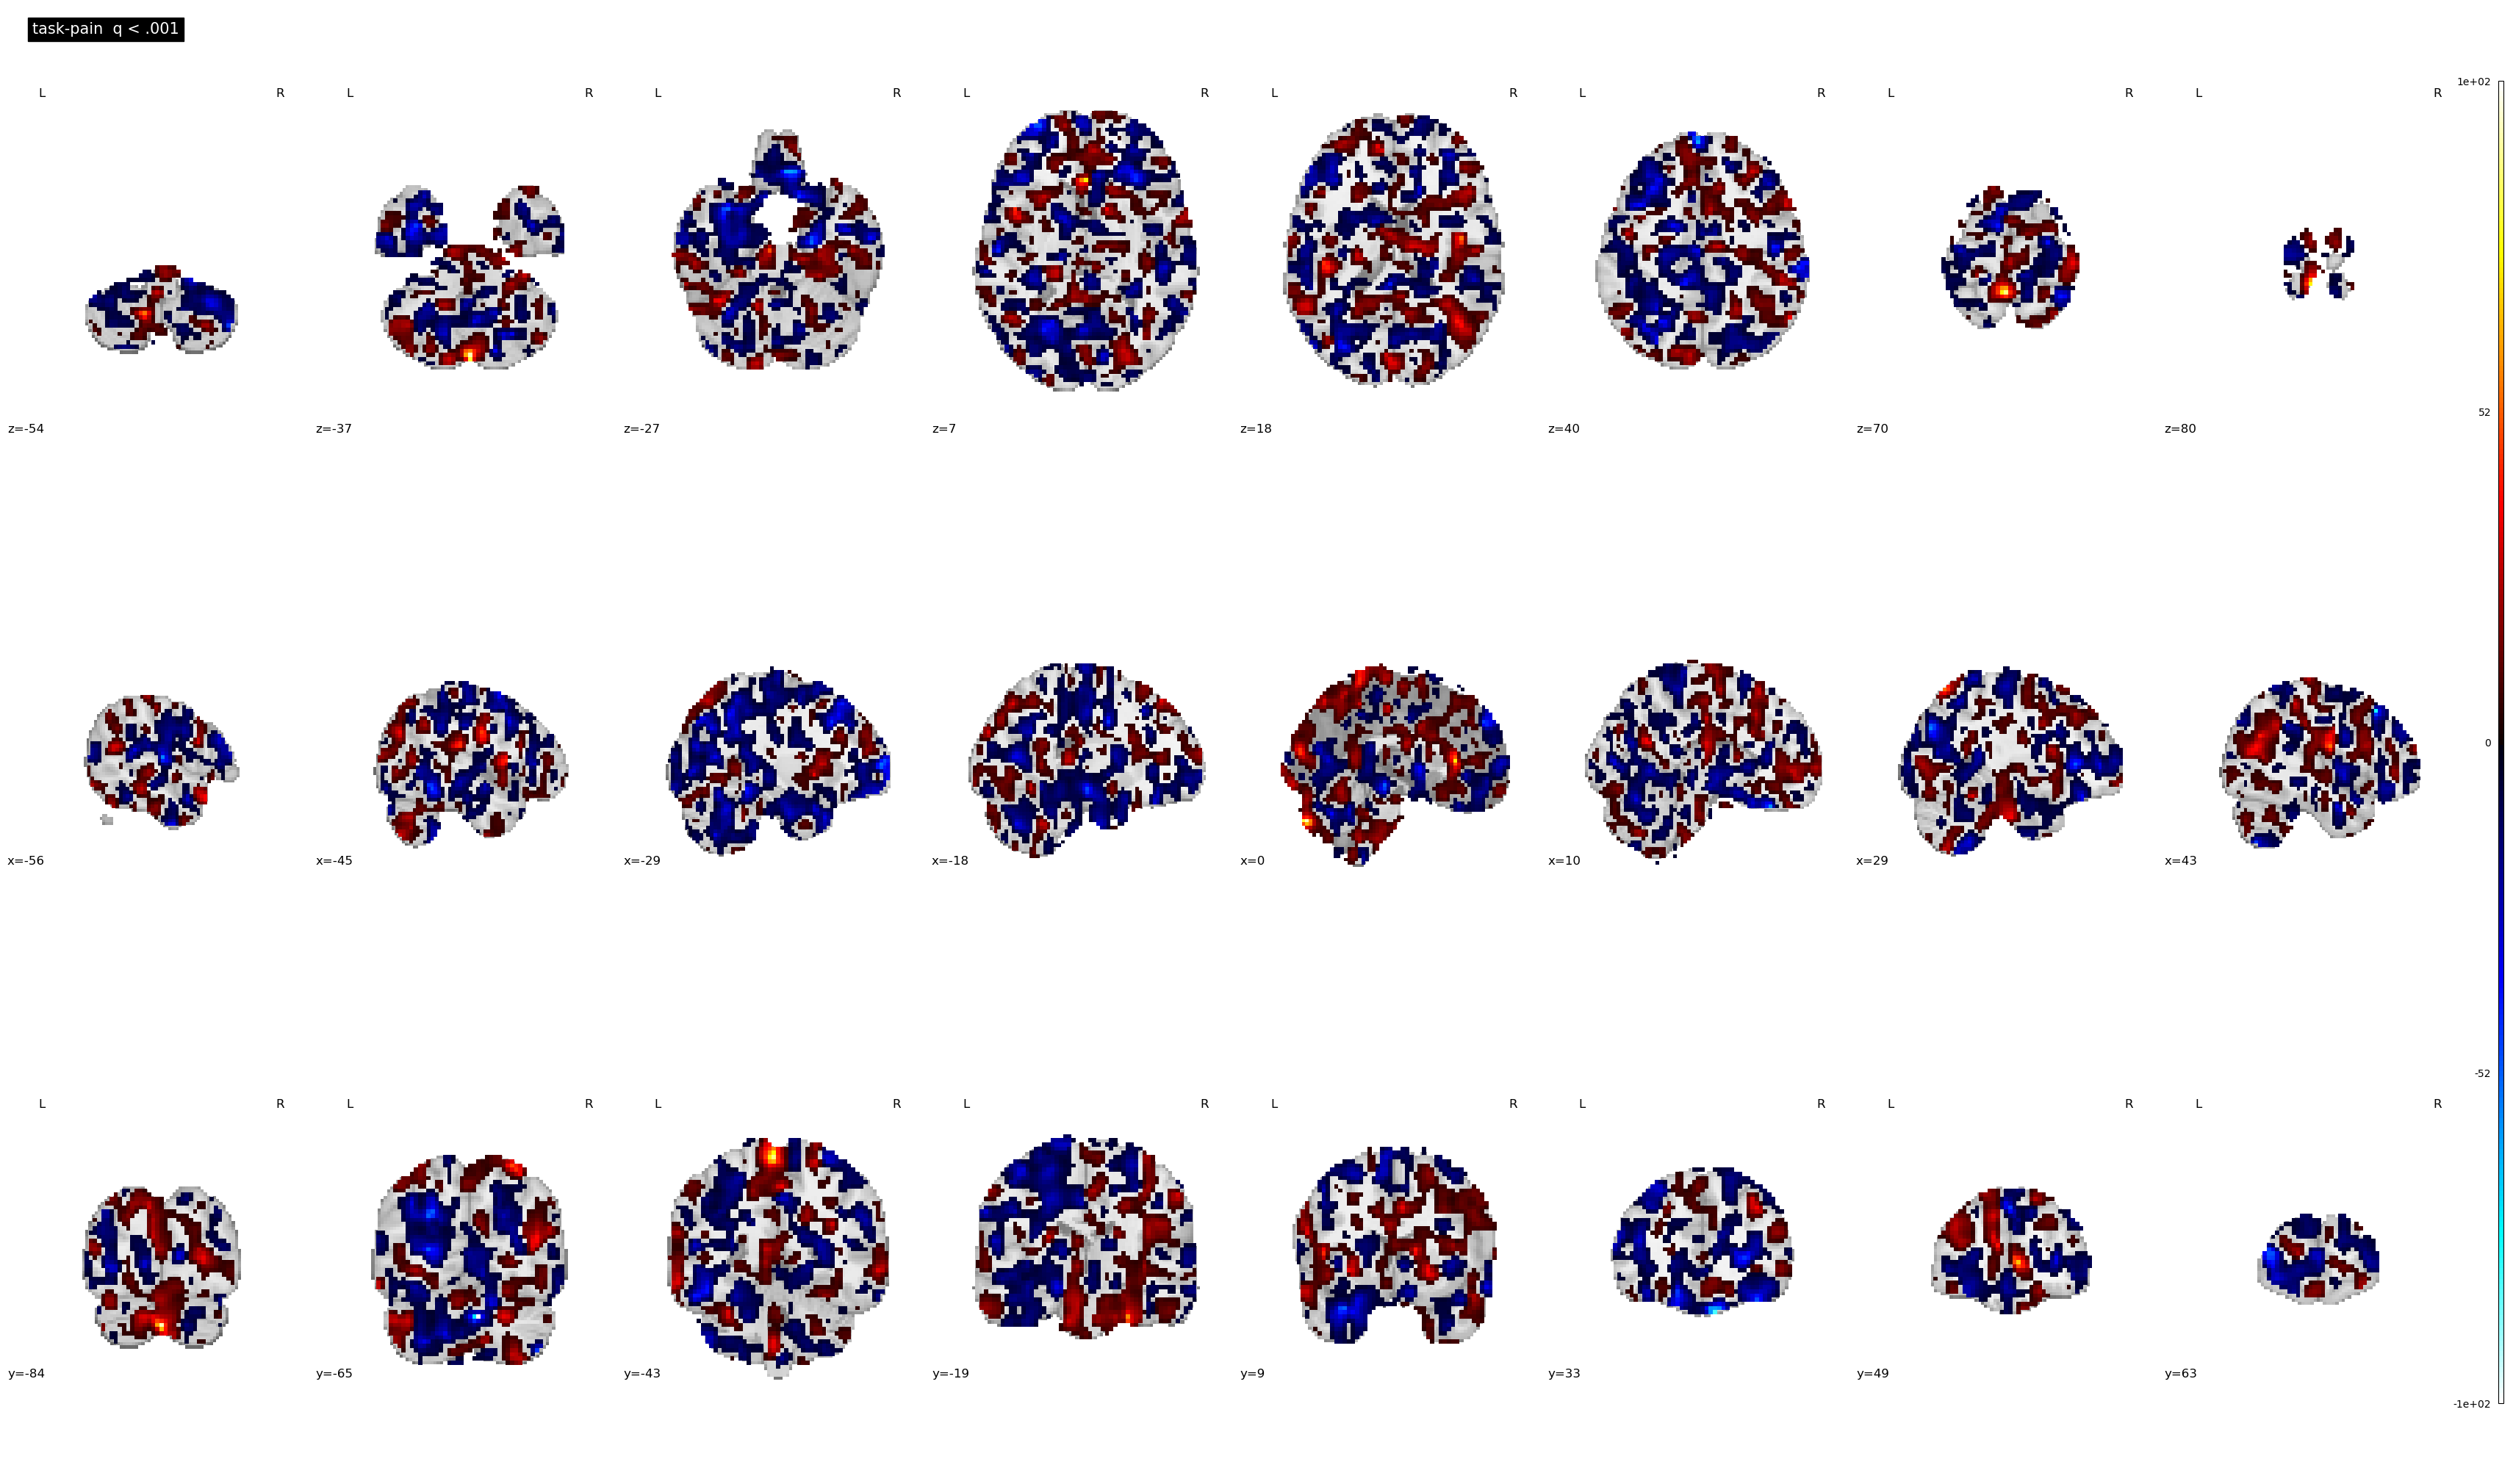

In [44]:
from nilearn import image, masking, maskers, plotting
import numpy as np
from scipy.stats import ttest_1samp
import statsmodels 
from statsmodels.stats import multitest
# Load beta maps
# Here, 'beta_maps' should be a list of file paths or Nifti image objects.
# Example: beta_maps = ['beta_map1.nii.gz', 'beta_map2.nii.gz', ...]
img_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/pls/NoNested_task-pain_reg01-stim_reg02-expect_reg03-outcome/'
beta_maps = image.load_img([
    join(img_dir, 'pls-predweights_fold-0_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-1_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-2_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-3_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-4_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-5_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-6_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-7_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-8_component-01_desc-stimuluscontrast.nii.gz'),
    join(img_dir, 'pls-predweights_fold-9_component-01_desc-stimuluscontrast.nii.gz')
])

# use niftimasker
imgfname = "/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial/sub-0060/sub-0060_ses-01_run-05_runtype-vicarious_event-stimulus_trial-011_cuetype-low_stimintensity-low.nii.gz"
ref_img = image.load_img(imgfname)
mask = image.load_img(
    "/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii"
)
mask_img = masking.compute_epi_mask(
    mask, target_affine=ref_img.affine, target_shape=ref_img.shape
)
nifti_masker = maskers.NiftiMasker(
    mask_img=mask_img,
    smoothing_fwhm=6,
    target_affine=ref_img.affine,
    target_shape=ref_img.shape,
)
# Convert the beta maps to a 2D array (n_maps x n_voxels)
beta_maps_2d = nifti_masker.fit_transform(beta_maps)

tvalues, pvalues = ttest_1samp(beta_maps_2d, 0, axis=0)
reject, qvalues, _, _ = multitest.multipletests(pvalues, method='fdr_bh')

result_mapp = np.zeros(beta_maps_2d.shape[1])
result_mapp[qvalues < .05] = tvalues[qvalues < .05]
con_tmapp = nifti_masker.inverse_transform(result_mapp)

result_map_001p = np.zeros(beta_maps_2d.shape[1])
result_map_001p[qvalues < .001] = tvalues[qvalues < .001]
con_tmap_001p = nifti_masker.inverse_transform(result_map_001p)

plotting.plot_stat_map(con_tmapp,  display_mode = 'mosaic', title = 'task-pain q < .05', cut_coords = 8)
plotting.plot_stat_map(con_tmap_001p,  display_mode = 'mosaic', title = 'task-pain  q < .001', cut_coords = 8)



<Axes: >

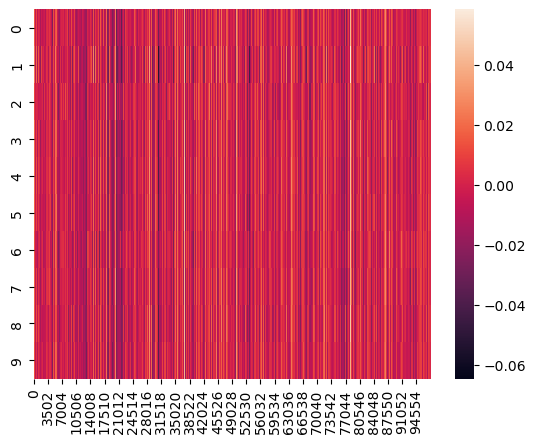

In [48]:
import seaborn as sns

sns.heatmap(beta_maps_2d)

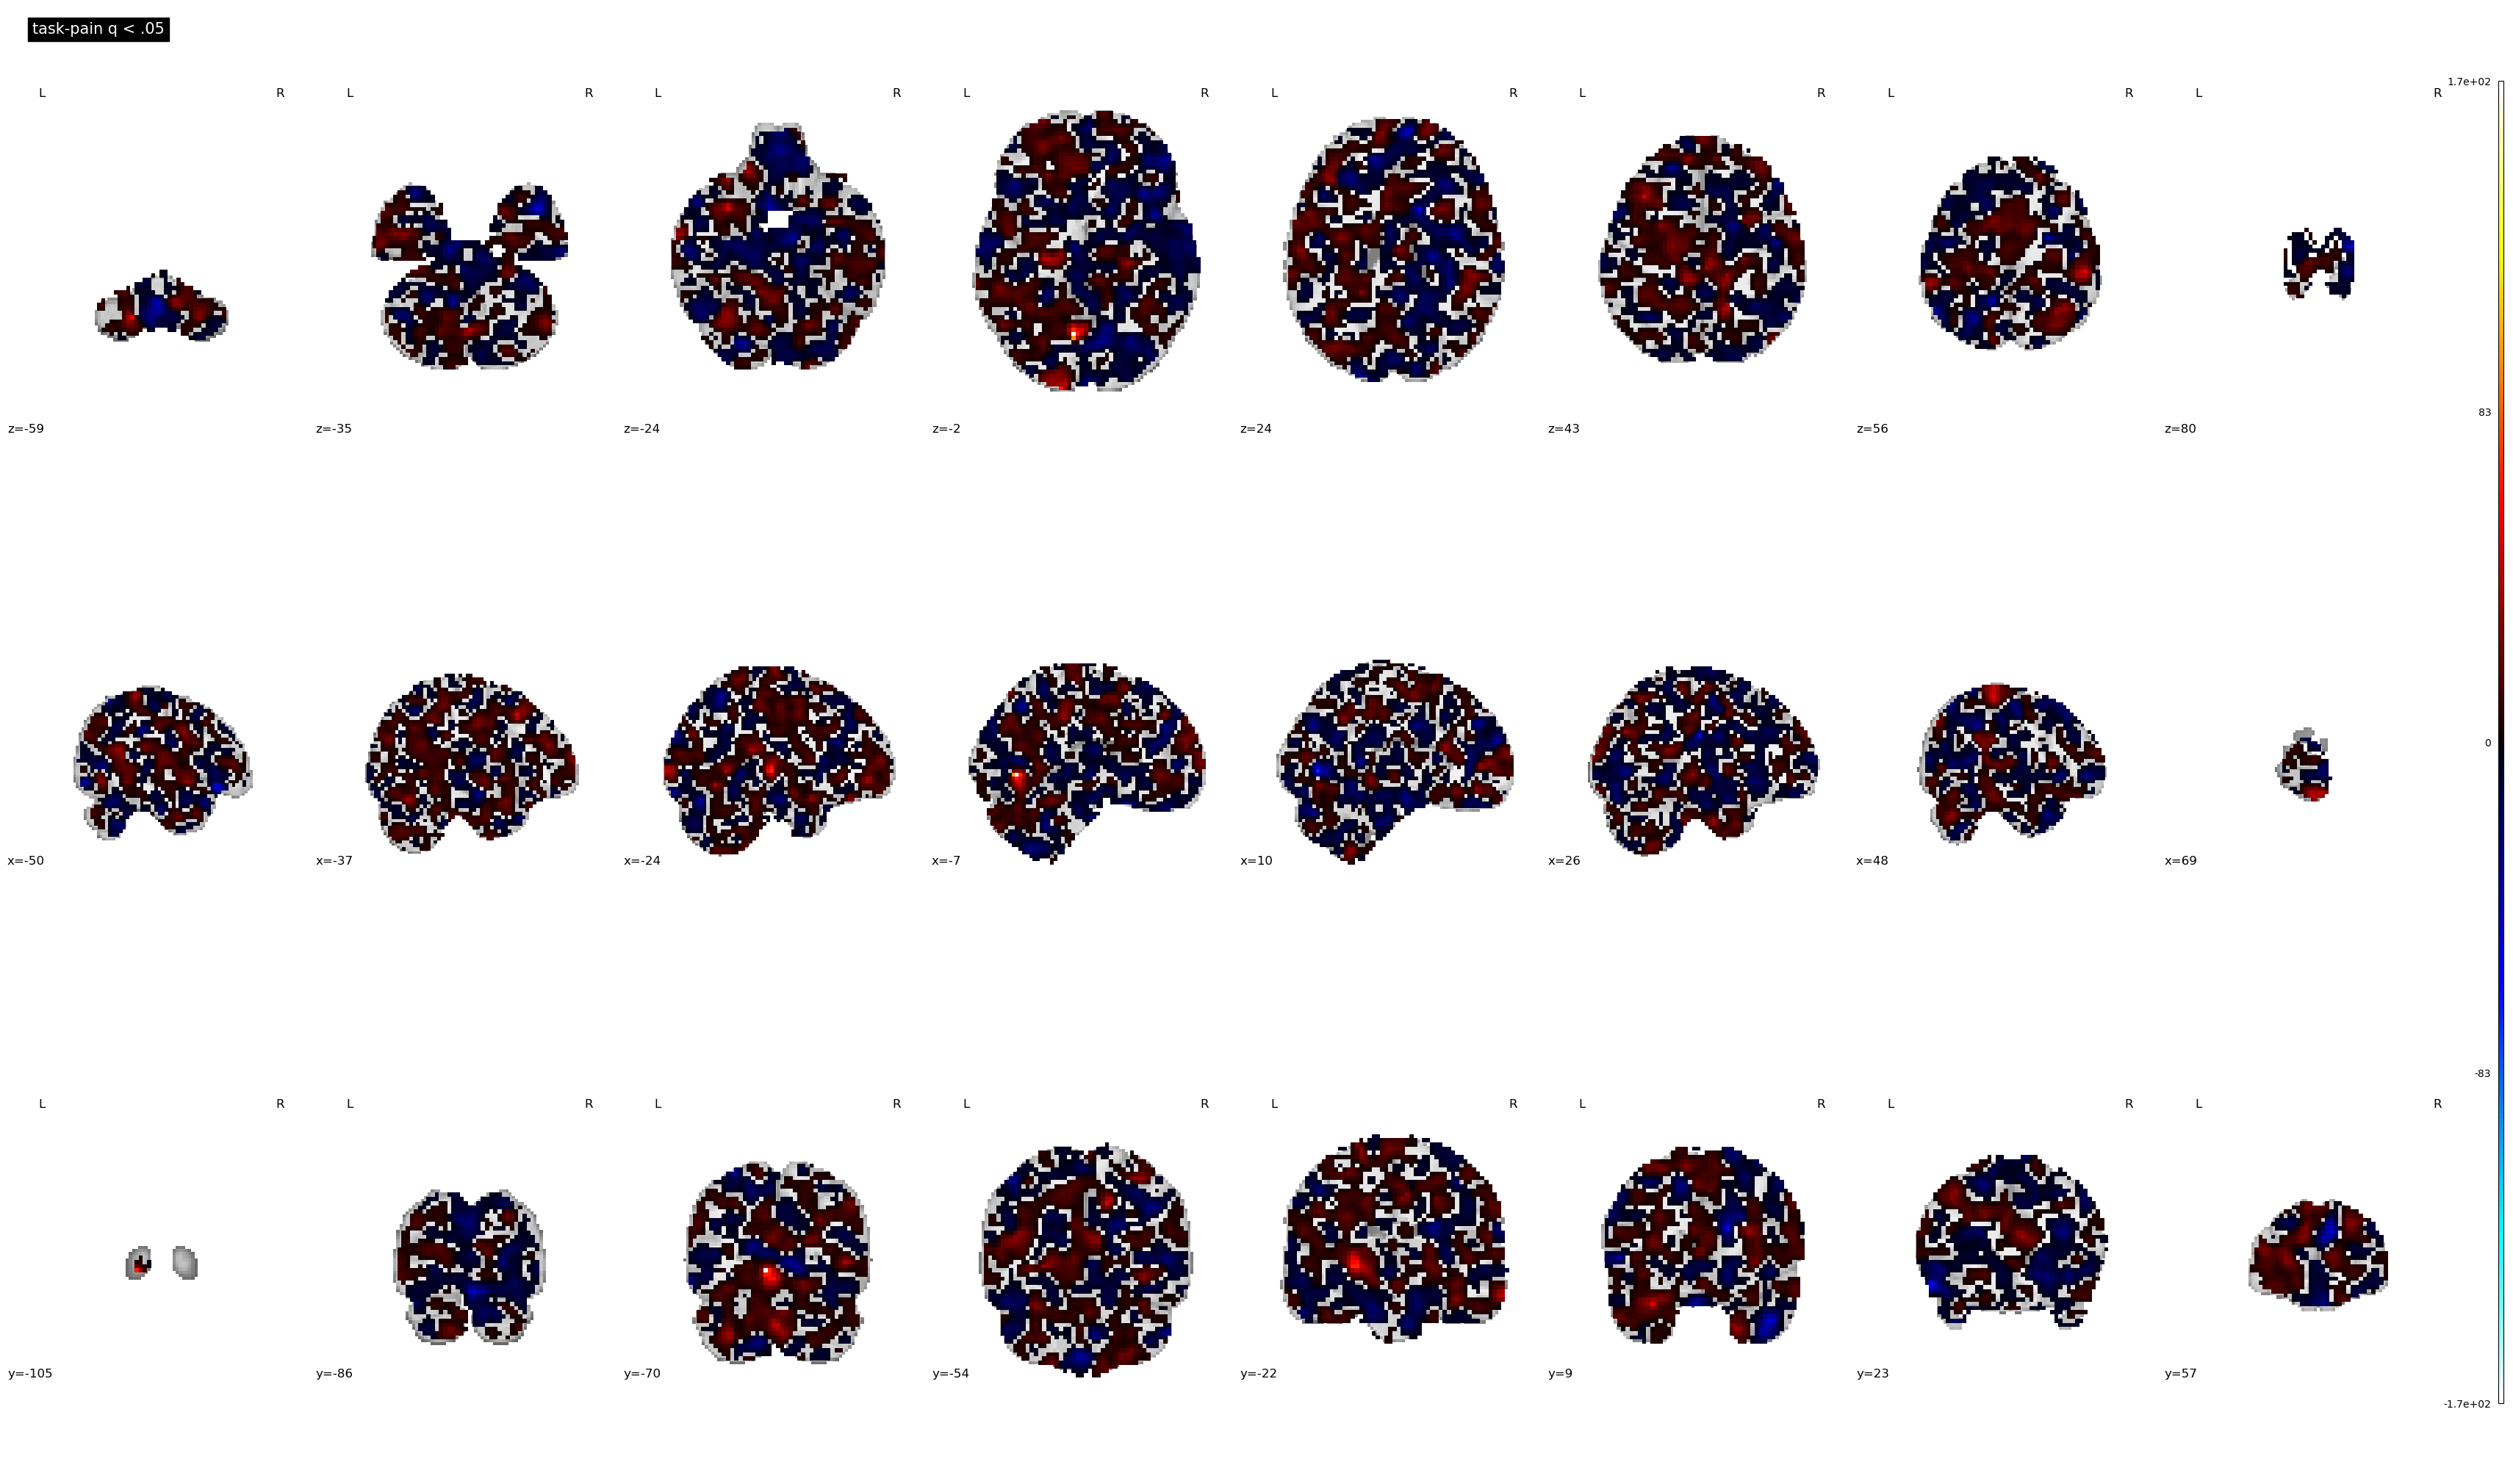

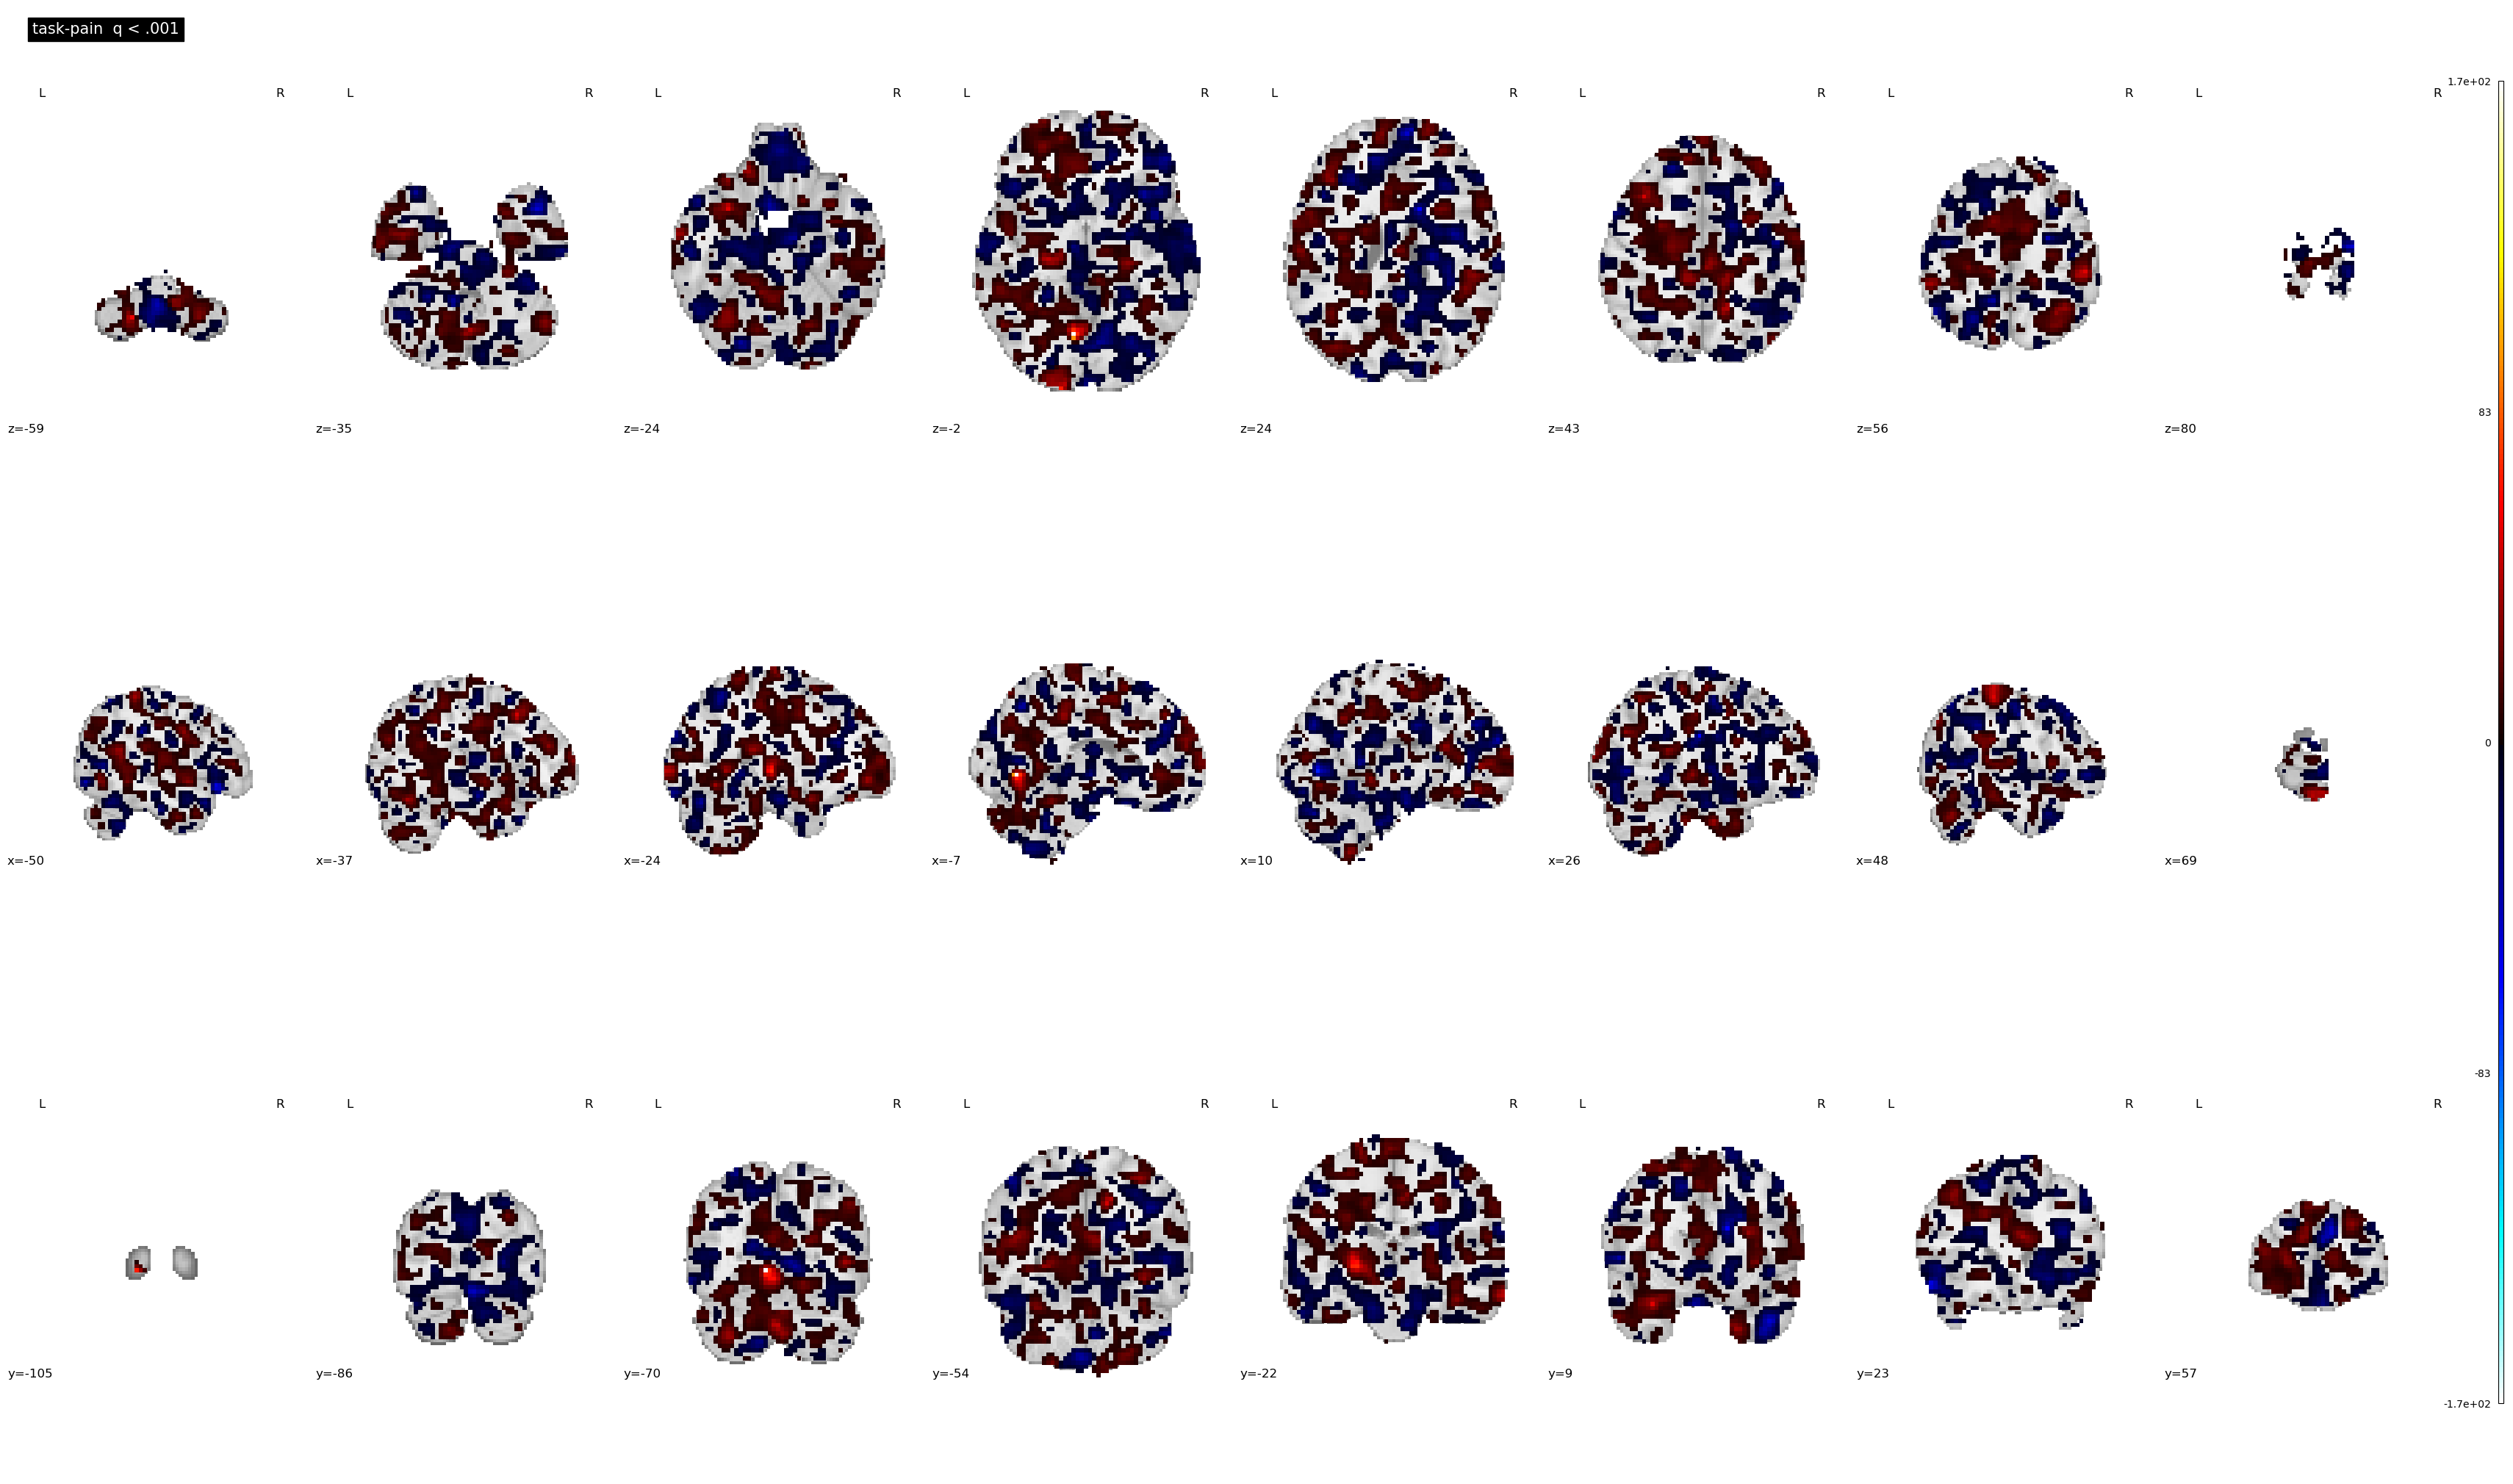

In [49]:
from nilearn import image, masking, maskers, plotting
import numpy as np
from scipy.stats import ttest_1samp
import statsmodels 
from statsmodels.stats import multitest
# Load beta maps
# Here, 'beta_maps' should be a list of file paths or Nifti image objects.
# Example: beta_maps = ['beta_map1.nii.gz', 'beta_map2.nii.gz', ...]
img_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/pls/NoNested_task-pain_reg01-stim_reg02-expect_reg03-outcome/'
beta_maps = image.load_img([
    join(img_dir, 'pls-predweights_fold-0_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-1_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-2_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-3_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-4_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-5_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-6_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-7_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-8_component-02_desc-expectrating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-9_component-02_desc-expectrating.nii.gz')
])

# use niftimasker
imgfname = "/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial/sub-0060/sub-0060_ses-01_run-05_runtype-vicarious_event-stimulus_trial-011_cuetype-low_stimintensity-low.nii.gz"
ref_img = image.load_img(imgfname)
mask = image.load_img(
    "/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii"
)
mask_img = masking.compute_epi_mask(
    mask, target_affine=ref_img.affine, target_shape=ref_img.shape
)
nifti_masker = maskers.NiftiMasker(
    mask_img=mask_img,
    smoothing_fwhm=6,
    target_affine=ref_img.affine,
    target_shape=ref_img.shape,
)
# Convert the beta maps to a 2D array (n_maps x n_voxels)
beta_maps_2d = nifti_masker.fit_transform(beta_maps)

tvalues, pvalues = ttest_1samp(beta_maps_2d, 0, axis=0)
reject, qvalues, _, _ = multitest.multipletests(pvalues, method='fdr_bh')

result_mapp = np.zeros(beta_maps_2d.shape[1])
result_mapp[qvalues < .05] = tvalues[qvalues < .05]
con_tmapp = nifti_masker.inverse_transform(result_mapp)

result_map_001p = np.zeros(beta_maps_2d.shape[1])
result_map_001p[qvalues < .001] = tvalues[qvalues < .001]
con_tmap_001p = nifti_masker.inverse_transform(result_map_001p)

plotting.plot_stat_map(con_tmapp,  display_mode = 'mosaic', title = 'task-pain q < .05', cut_coords = 8)
plotting.plot_stat_map(con_tmap_001p,  display_mode = 'mosaic', title = 'task-pain  q < .001', cut_coords = 8)



In [36]:
beta_maps_2d.shape

(458294, 10)

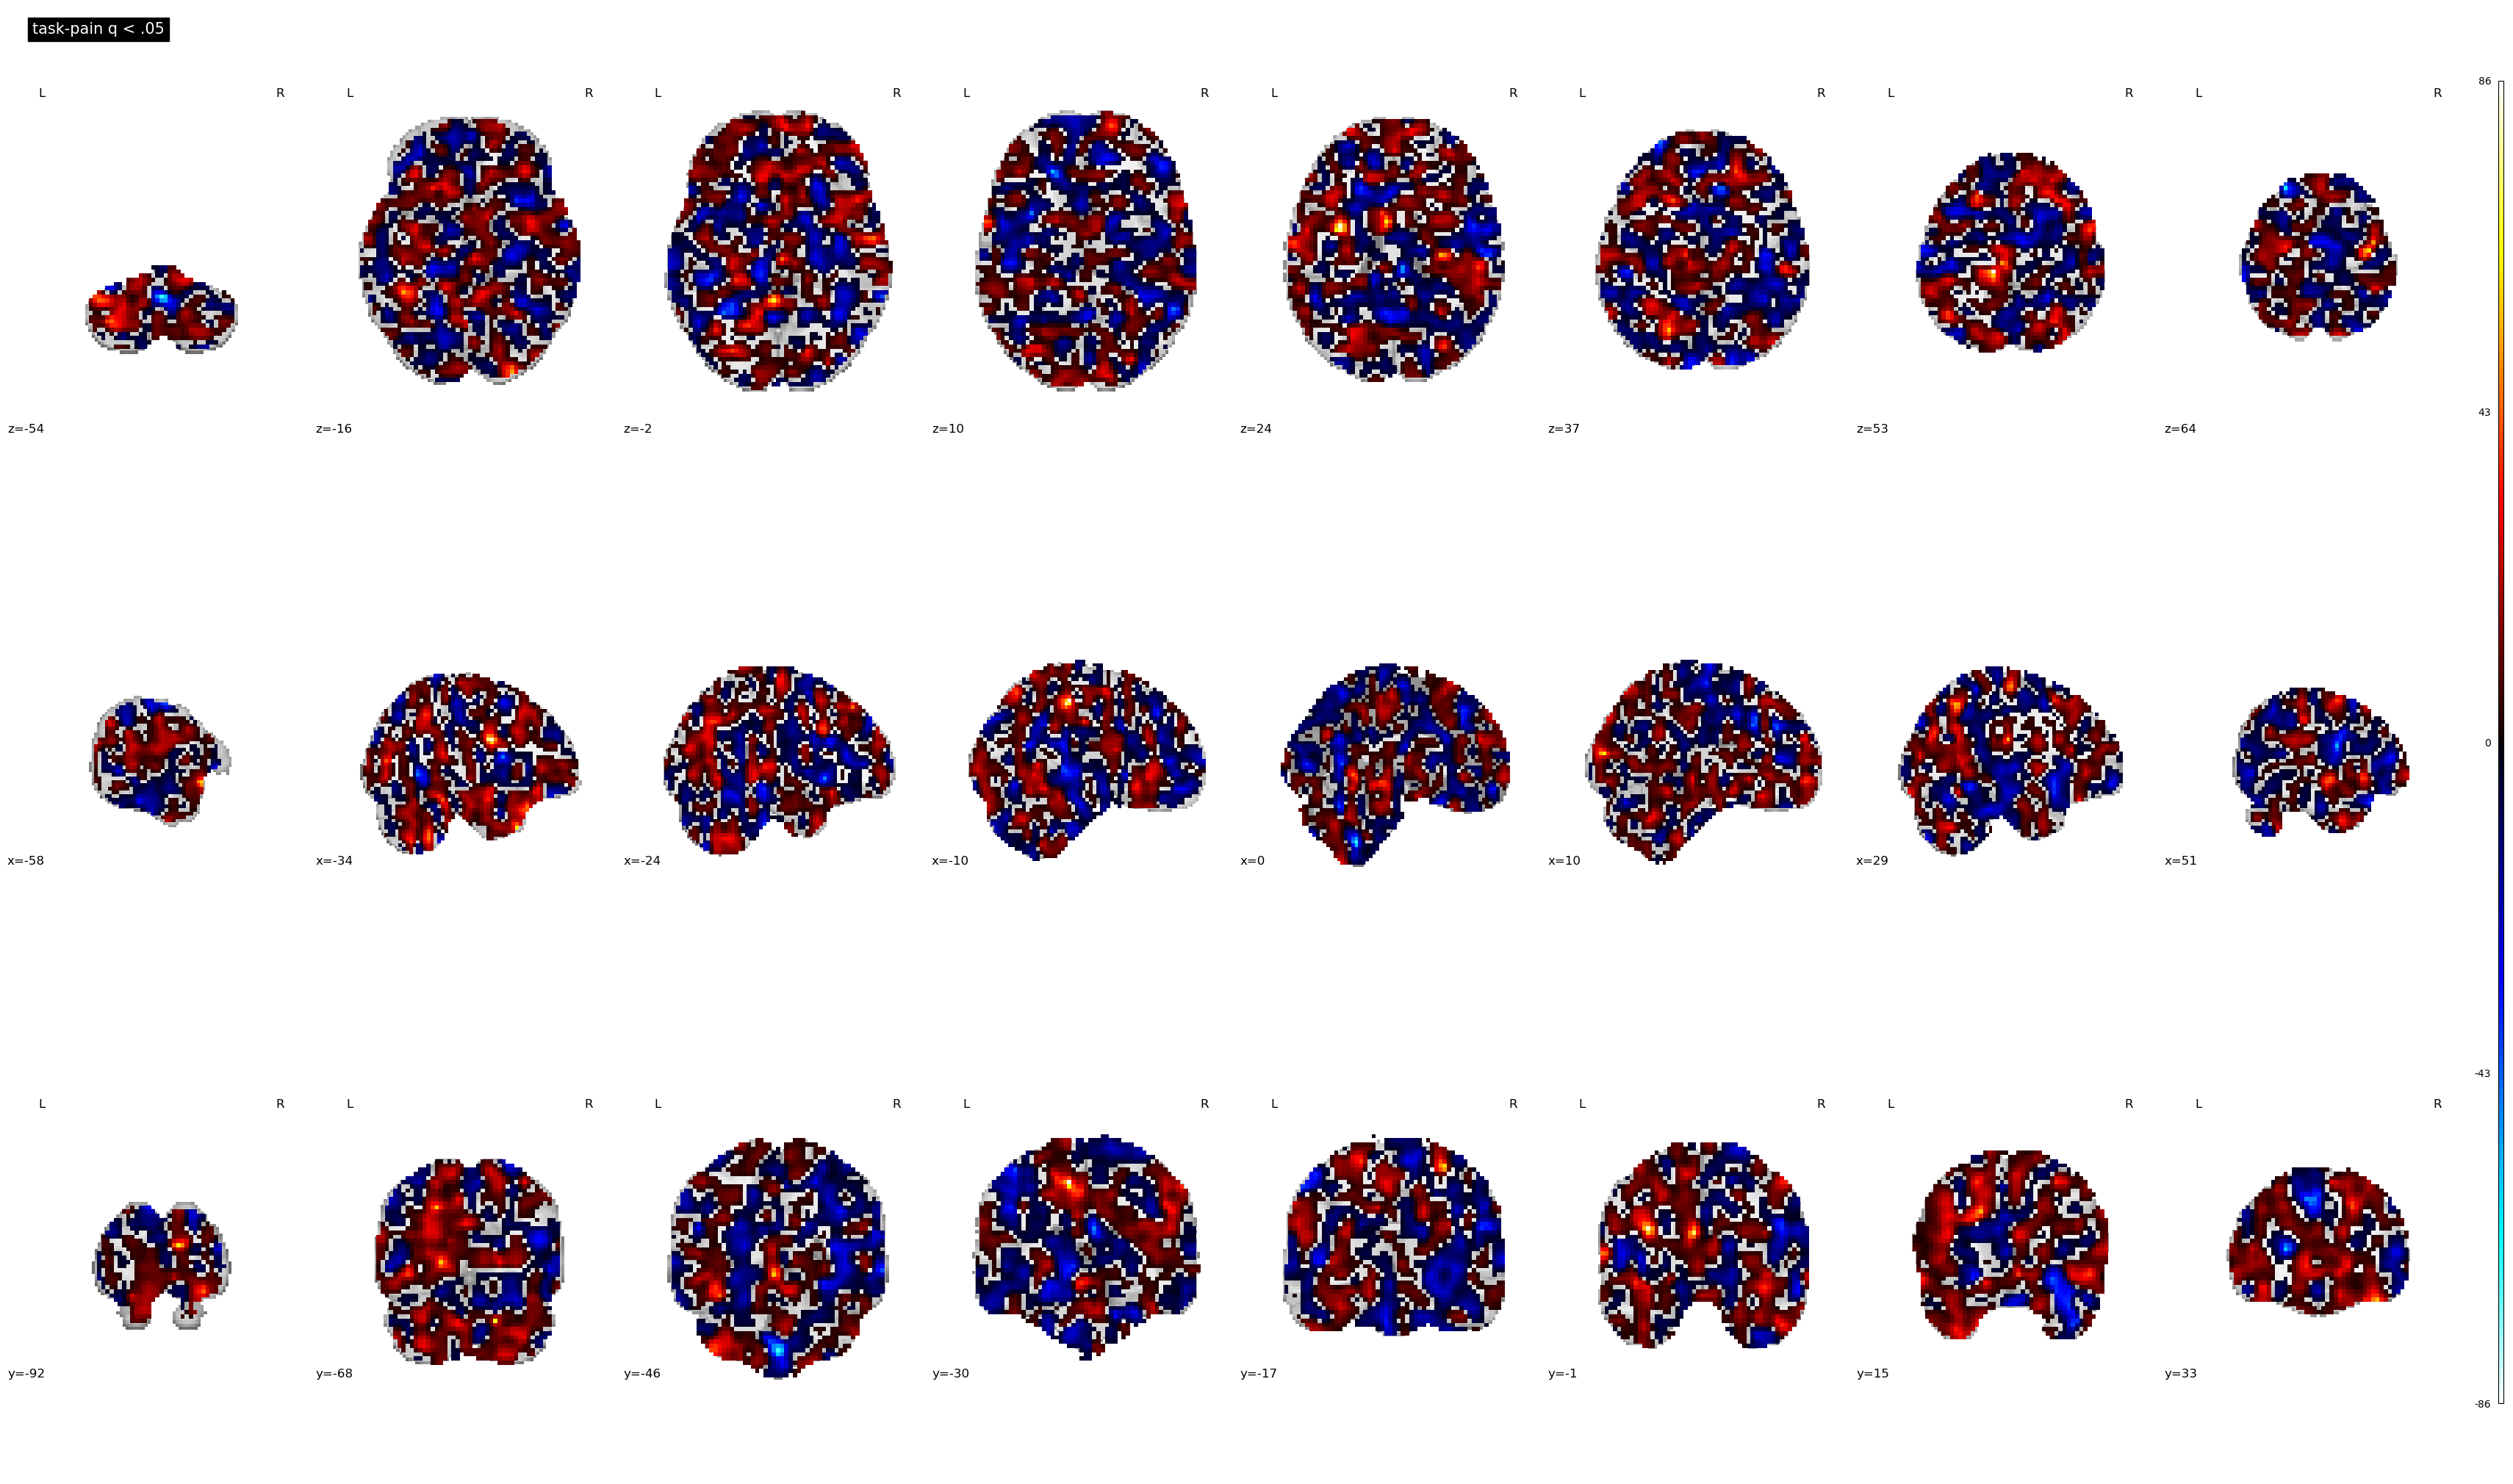

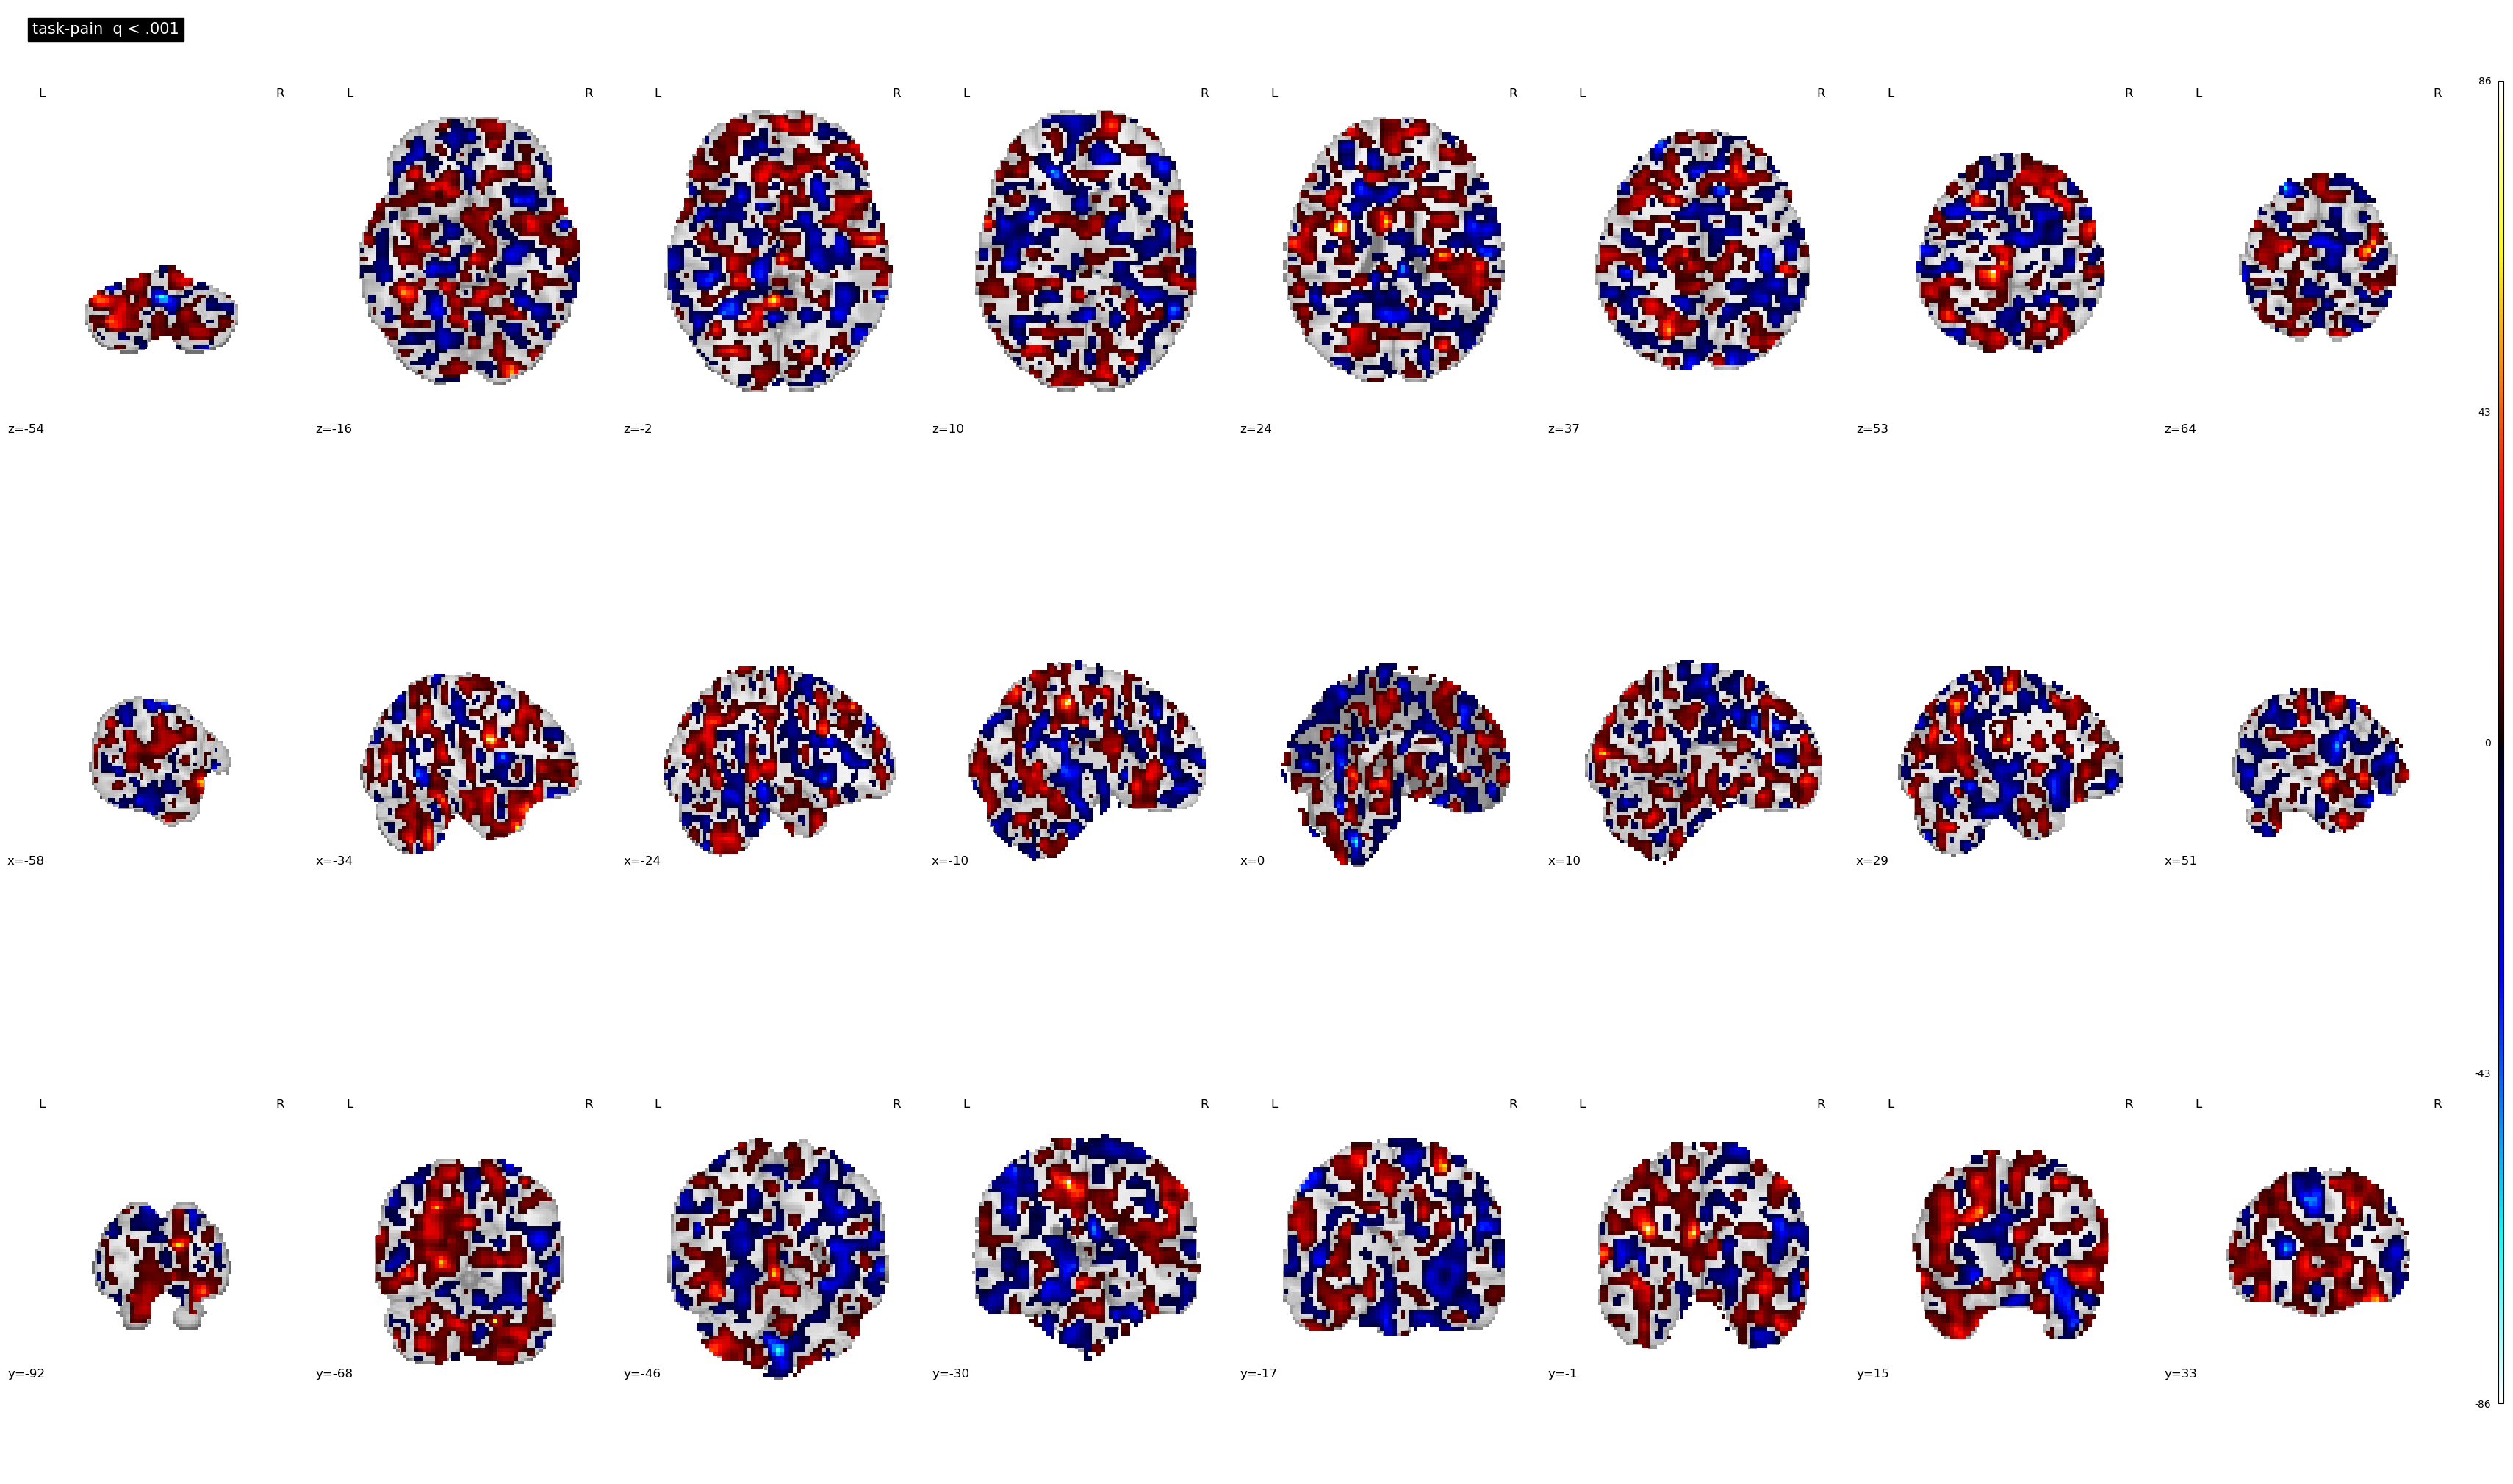

In [50]:
from nilearn import image, masking, maskers, plotting
import numpy as np
from scipy.stats import ttest_1samp
import statsmodels 
from statsmodels.stats import multitest
# Load beta maps
# Here, 'beta_maps' should be a list of file paths or Nifti image objects.
# Example: beta_maps = ['beta_map1.nii.gz', 'beta_map2.nii.gz', ...]
img_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/pls/NoNested_task-pain_reg01-stim_reg02-expect_reg03-outcome/'
beta_maps = image.load_img([
    join(img_dir, 'pls-predweights_fold-0_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-1_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-2_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-3_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-4_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-5_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-6_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-7_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-8_component-03_desc-outcomerating.nii.gz'),
    join(img_dir, 'pls-predweights_fold-9_component-03_desc-outcomerating.nii.gz')
])

# use niftimasker
imgfname = "/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial/sub-0060/sub-0060_ses-01_run-05_runtype-vicarious_event-stimulus_trial-011_cuetype-low_stimintensity-low.nii.gz"
ref_img = image.load_img(imgfname)
mask = image.load_img(
    "/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii"
)
mask_img = masking.compute_epi_mask(
    mask, target_affine=ref_img.affine, target_shape=ref_img.shape
)
nifti_masker = maskers.NiftiMasker(
    mask_img=mask_img,
    smoothing_fwhm=6,
    target_affine=ref_img.affine,
    target_shape=ref_img.shape,
)
# Convert the beta maps to a 2D array (n_maps x n_voxels)
beta_maps_2d = nifti_masker.fit_transform(beta_maps)

tvalues, pvalues = ttest_1samp(beta_maps_2d, 0, axis=0)
reject, qvalues, _, _ = multitest.multipletests(pvalues, method='fdr_bh')

result_mapp = np.zeros(beta_maps_2d.shape[1])
result_mapp[qvalues < .05] = tvalues[qvalues < .05]
con_tmapp = nifti_masker.inverse_transform(result_mapp)

result_map_001p = np.zeros(beta_maps_2d.shape[1])
result_map_001p[qvalues < .001] = tvalues[qvalues < .001]
con_tmap_001p = nifti_masker.inverse_transform(result_map_001p)

plotting.plot_stat_map(con_tmapp,  display_mode = 'mosaic', title = 'task-pain q < .05', cut_coords = 8)
plotting.plot_stat_map(con_tmap_001p,  display_mode = 'mosaic', title = 'task-pain  q < .001', cut_coords = 8)



<Axes: >

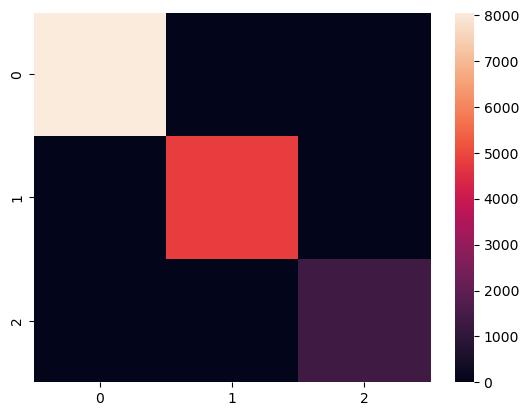

In [52]:
sns.heatmap(np.array([[8.05877258e+03, 5.86197757e-13, 3.94351218e-13],
       [5.86197757e-13, 4.81394444e+03, 1.52233781e-12],
       [3.94351218e-13, 1.52233781e-12, 1.32933566e+03]]))

<Axes: >

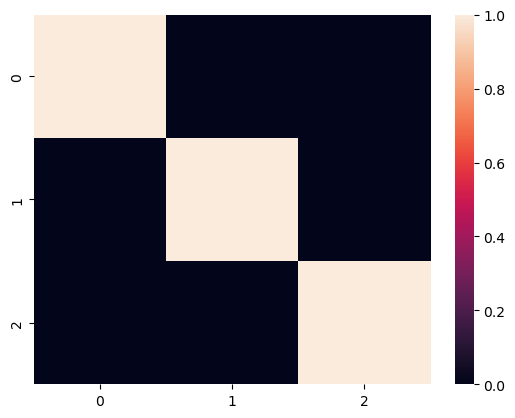

In [53]:
sns.heatmap(np.array([[1.00000000e+00, 8.50014503e-17, 1.89518540e-16],
       [8.50014503e-17, 1.00000000e+00, 6.03683770e-16],
       [1.89518540e-16, 6.03683770e-16, 1.00000000e+00]]))

<Axes: >

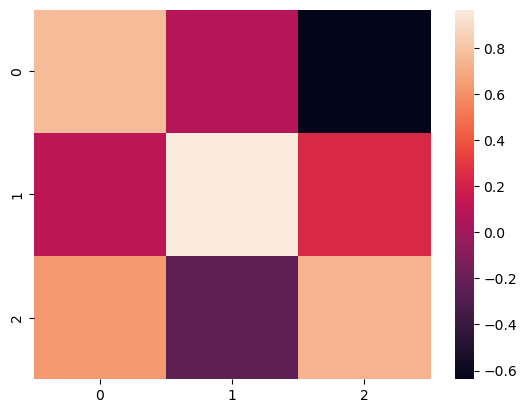

In [55]:
sns.heatmap(np.array([[ 0.76648386,  0.07409421, -0.63797534],
       [ 0.10407125,  0.96586779,  0.23721002],
       [ 0.63377572, -0.24821254,  0.73261099]]))

<Axes: >

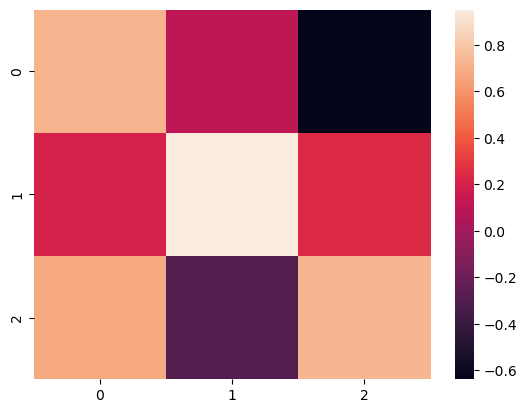

In [57]:
sns.heatmap(np.array([[ 0.71987153,  0.11235245, -0.63797534],
       [ 0.20647985,  0.95164272,  0.23721002],
       [ 0.67333201, -0.29214592,  0.73261099]]))

In [61]:
image_data_list = [img.get_fdata() for img in subject_averages.values()]

# for subject_id, nifti_image in nifti_images.items():
#     filename = f"subject_{subject_id}.nii.gz"  # .nii.gz for compressed
#     nib.save(nifti_image, filename)

# image_data_list
import statsmodels 
from statsmodels.stats import multitest
import scipy

# brain_df = np.stack(image_data_list, axis=-1)
# # X_array = nifti_masker.fit(brain_df)
# reshaped_brain = brain_contribution_img.get_fdata().reshape(-1, brain_contribution_img.shape[-1])
# reshaped_braindf = reshaped_brain.T
# print( f"reshaped_brain_df: {reshaped_brain.shapef}")
# X_array = nifti_masker.fit_transform(brain_df), #reshaped_brain_df)#reshaped_brain_df)
# # print("X")
################
# calculate average maps for participant
X_array = nifti_masker.fit_transform(brain_contribution_img)
df = pd.DataFrame(X_array)
group_ids = groups[test_idx]
df['group'] = group_ids
subjectwise = df.groupby(['group']).mean()
# ids=np.unique(a[:,0]) #array of unique ids
# pos_mean=[np.mean(X_array[group_ids==i, :], axis=0) for i in group_ids]

tvalues, pvalues = scipy.stats.ttest_1samp( subjectwise, popmean=0, axis = 0, nan_policy = 'omit',alternative='two-sided' )
reject, qvalues, _, _ = multitest.multipletests(pvalues, method='fdr_bh')
unthres_tmap = nifti_masker.inverse_transform(tvalues)

result_map = np.zeros(subjectwise.shape[1])
result_map[qvalues < .05] = tvalues[qvalues < .05]
con_tmap = nifti_masker.inverse_transform(result_map)

result_map_001 = np.zeros(subjectwise.shape[1])
result_map_001[qvalues < .0001] = tvalues[qvalues < .0001]
con_tmap_001 = nifti_masker.inverse_transform(result_map_001)

plotting.plot_stat_map(con_tmap,  display_mode = 'mosaic', title = 'q < .05')
plotting.plot_stat_map(con_tmap_001,  display_mode = 'mosaic', title = 'q < .001')
# plotting.plot_stat_map(con_bmap, threshold = 1, display_mode = 'mosaic')
unthres_tmap = nifti_masker.inverse_transform(tvalues)
unthres_tmap.to_filename(join(save_dir, 'latent-01.nii.gz'))
con_tmap.to_filename(join(save_dir,'latent-01_task-pain_q-05.nii.gz'))
con_tmap_001.to_filename(join(save_dir,'latent-01_task-pain_q-001.nii.gz'))

NameError: name 'subject_averages' is not defined

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


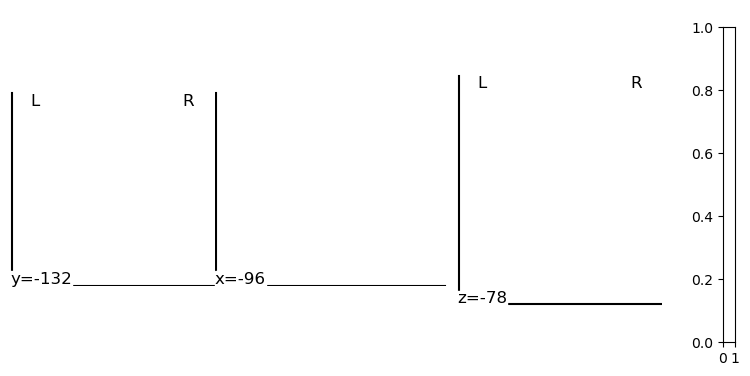

In [64]:
tmap = image.load_img('/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/pls/nonest_task-pain_X-outcome-stim-expect_Y-brain/latent-01.nii.gz')
plotting.plot_stat_map(tmap)